In [119]:
import math
import tensorflow as tf
single_x = []
single_y = []
single_z = []
single_E = []
single_x.append([])
single_y.append([])
single_z.append([])
single_E.append([])
single_gamma_length = 0
idx = 0
gamma_length = 0
with open("/Users/haomingyang/Environments/nexo_py/scripts/AnalyzePosition/Single_x.txt") as f1,open("/Users/haomingyang/Environments/nexo_py/scripts/AnalyzePosition/Single_y.txt") as f2, open("/Users/haomingyang/Environments/nexo_py/scripts/AnalyzePosition/Single_z.txt") as f3,open("/Users/haomingyang/Environments/nexo_py/scripts/AnalyzePosition/Single_E.txt") as f4:
#read in data that has been analyzed, File above only contains single-sited data
    for (line1,line2,line3,line4) in zip(f1,f2,f3,f4): 
        if (line1 == "gamma\n"):
            single_gamma_length += 1
        if(line1 != "gamma\n" and line1 != "bb0n\n"):
            single_x[idx].append(float(line1))
            single_y[idx].append(float(line2))
            single_z[idx].append(float(line3))
            single_E[idx].append(float(line4))
        else:
            idx+=1
            single_x.append([])
            single_y.append([])
            single_z.append([])
            single_E.append([])

In [120]:
import numpy as np
x_average_center = []
y_average_center = []
z_average_center = []
#Calculate the center of x, y, z, in order to have a coordinate for the center of trajectory
for i in range(0, len(single_x)):
    x_center = np.average(single_x[i], weights = single_E[i])
    x_average_center.append(x_center)
    y_center = np.average(single_y[i], weights = single_E[i])
    y_average_center.append(y_center)
    z_center = np.average(single_z[i], weights = single_E[i])
    z_average_center.append(z_center)

In [121]:
import math
x_radius = []
y_radius = []
z_radius = []

x_radius.append([])
y_radius.append([])
z_radius.append([])

radius = []
radius.append([])

# Calculate the distance between each point to the center in their coordinate
for i in range(0, len(single_x)):
    for j in range(0, len(single_x[i])):
        x_radius[i].append(abs(single_x[i][j] - x_average_center[i]))
        y_radius[i].append(abs(single_y[i][j] - y_average_center[i]))
        z_radius[i].append(abs(single_z[i][j] - z_average_center[i]))
        radius[i].append(math.sqrt(x_radius[i][j]**(2) + y_radius[i][j]**(2) + z_radius[i][j]**(2)))
        
    x_radius.append([])
    y_radius.append([])
    z_radius.append([])
    radius.append([])

x_radius.pop()
y_radius.pop()
z_radius.pop()
radius.pop()

[]

In [122]:
x_average_radius = []
y_average_radius = []
z_average_radius = []
average_radius = []
average_radius.append([])
#Calculate the average distance of x, y, z coordinate, then calculate the average distance of each point to the center
#This step and the step on the above cell could be edited into a single process
for i in range (0,len(single_x)):
    x_average_radius.append(np.average(x_radius[i], weights = single_E[i]))
    y_average_radius.append(np.average(y_radius[i], weights = single_E[i]))
    z_average_radius.append(np.average(z_radius[i], weights = single_E[i]))
    for j in range (0, len(x_radius[i])):
        average_radius[i].append(math.sqrt(x_radius[i][j]**(2) + y_radius[i][j]**(2) + z_radius[i][j]**(2)))
    average_radius.append([])
average_radius.pop()

[]

In [175]:
#Select a R_cutoff, since we are analyzing the events that has largely overlapping radius, I have chosen 1
r_cutoff = 1

In [176]:
#Cut the events that has radius > 1
weighted_average_radius = []
cut_x_radius = []
cut_y_radius = []
cut_z_radius = []
cut_single_E = []
cut_single_x = []
cut_single_y = []
cut_single_z = []
cut_single_R = []
count = 0

print (single_gamma_length)
for i in range (0,len(single_x)):
    weighted_average_radius.append(np.average(average_radius[i], weights = single_E[i]))
    
for i in range(0, len(weighted_average_radius)):
    if (i < single_gamma_length and weighted_average_radius[i] <= r_cutoff):
        count += 1
        cut_single_E.append(single_E[i])
        cut_single_x.append(single_x[i])
        cut_single_y.append(single_y[i])
        cut_single_z.append(single_z[i])
        cut_x_radius.append(x_radius[i])
        cut_y_radius.append(y_radius[i])
        cut_z_radius.append(z_radius[i])
        cut_single_R.append(average_radius[i])
for i in range(single_gamma_length, len(weighted_average_radius)):
    if (weighted_average_radius[i] <= r_cutoff):
        cut_single_E.append(single_E[i])
        cut_single_x.append(single_x[i])
        cut_single_y.append(single_y[i])
        cut_single_z.append(single_z[i])
        cut_x_radius.append(x_radius[i])
        cut_y_radius.append(y_radius[i])
        cut_z_radius.append(z_radius[i])
        cut_single_R.append(average_radius[i])
    if (len(cut_single_x) == 2* count and count != 0):
        break
        #weighted_average_radius.pop(i)
print(count)
print(len(cut_single_x))
cut_single_gamma_length = count

10971
4620
9240


In [177]:
#Calculate relative radius
x_relative_radius = []
y_relative_radius = []
z_relative_radius = []
x_relative_radius.append([])
y_relative_radius.append([])
z_relative_radius.append([])
for i in range(0, len(cut_single_x)):
    max_x_radius = max(cut_x_radius[i])
    max_y_radius = max(cut_y_radius[i])
    max_z_radius = max(cut_z_radius[i])
    min_x_radius = min(cut_x_radius[i])
    min_y_radius = min(cut_y_radius[i])
    min_z_radius = min(cut_z_radius[i])
    for j in range(0, len(cut_single_x[i])):
        x_relative_radius[i].append((cut_x_radius[i][j] - min_x_radius)/(max_x_radius - min_x_radius))
        y_relative_radius[i].append((cut_y_radius[i][j] - min_y_radius)/(max_y_radius - min_y_radius))
        z_relative_radius[i].append((cut_z_radius[i][j] - min_z_radius)/(max_z_radius - min_z_radius))
    x_relative_radius.append([])
    y_relative_radius.append([])
    z_relative_radius.append([])
x_relative_radius.pop()
y_relative_radius.pop()
z_relative_radius.pop()

[]

In [178]:
#Lastly Calculate the average radius of the events that has radius less than 1
cut_single_average_radius=[]
for i in range (0,len(cut_single_x)):
    cut_single_average_radius.append(np.average(cut_single_R[i], weights = cut_single_E[i]))

In [179]:
#this step fit the data into a 40*40 grid. At each point of the grid, energy is added, creating a trajectory that
#trace the energy and movement of the particle
xy = np.ndarray(shape=(40,40), dtype=float)
xz = np.ndarray(shape=(40,40), dtype=float)
yz = np.ndarray(shape=(40,40), dtype=float)

xy.fill(0)
xz.fill(0)
yz.fill(0)
train_xy = []
train_xz = []
train_yz = []
for i in range(0, len(cut_single_x)):
    min_x = min(cut_single_x[i])
    min_y = min(cut_single_y[i])
    min_z = min(cut_single_z[i])
    max_x = max(cut_single_x[i])
    max_y = max(cut_single_y[i])
    max_z = max(cut_single_z[i])
    for j in range(0, len(cut_single_x[i])):
        cur_x = abs((cut_single_x[i][j]-min_x)/(max_x-min_x))
        cur_y = abs((cut_single_y[i][j]-min_y)/(max_y-min_y))
        cur_z = abs((cut_single_z[i][j]-min_z)/(max_z-min_z))
        #calculate the ratio between the average radius 
        #of this events and the distance between this particular point to the center
        ratio = cut_single_average_radius[i]/(cut_x_radius[i][j]**2+cut_y_radius[i][j]**2 + cut_z_radius[i][j]**2)**0.5
        #The weight factor helps to magnify the effect of the data points that are closer to the center
        weight = (ratio**2)*10000
        xy[int((40*x_relative_radius[i][j] - 1)*cur_x)][int((40*y_relative_radius[i][j] - 1)*cur_y)] += cut_single_E[i][j]*weight
        xz[int((40*x_relative_radius[i][j] - 1)*cur_x)][int((40*z_relative_radius[i][j] - 1)*cur_z)] += cut_single_E[i][j]*weight
        yz[int((40*y_relative_radius[i][j] - 1)*cur_y)][int((40*z_relative_radius[i][j] - 1)*cur_z)] += cut_single_E[i][j]*weight
    train_xy.append(xy)
    train_xz.append(xz)
    train_yz.append(yz)
    
    xy = np.ndarray(shape=(40,40), dtype=float)
    xz = np.ndarray(shape=(40,40), dtype=float)
    yz = np.ndarray(shape=(40,40), dtype=float)
    xy.fill(0)
    xz.fill(0)
    yz.fill(0)
print(len(train_xy))

9240


In [180]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def visualize(idx, train):
    x,y= train[idx].nonzero()
    sum(train[idx])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    #it is possible to set up alpha value to visualize which point is weighted more
    ax.scatter(x, y, c= 'red')
    plt.show()

9240
10971
gamma x-y


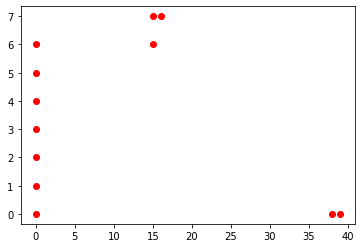

gamma x-z


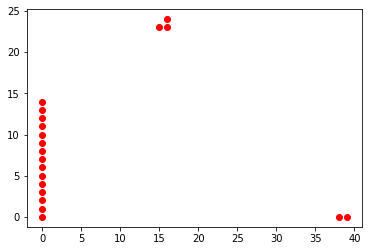

gamma y_z


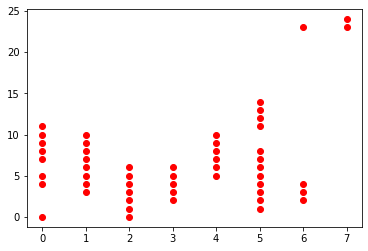

bb0n x-y


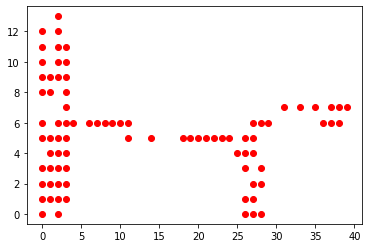

bb0n x-z


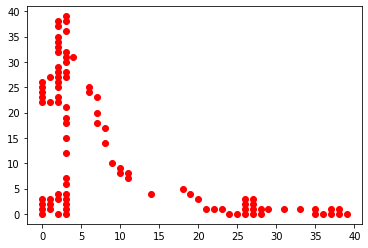

bb0n y-z


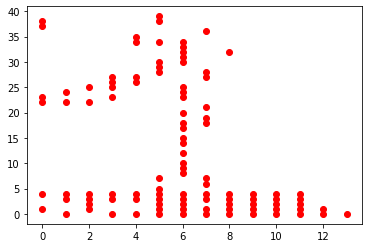

In [181]:
#Some visulization
import random
print(len(train_xy))
print (single_gamma_length)
print("gamma x-y")
temp1 = random.randint(0, count)
visualize(temp1, train_xy)
print("gamma x-z")
visualize(temp1, train_xz)
print("gamma y_z")
visualize(temp1, train_yz)
print("bb0n x-y")
temp2 = random.randint(count, count*2-1)
visualize(temp2, train_xy)
print("bb0n x-z")
visualize(temp2, train_xz)
print("bb0n y-z")
visualize(temp2, train_yz)

In [182]:
#steps to prepare data for training
label = np.ndarray(shape=(len(train_xy)), dtype=int)
label[:cut_single_gamma_length].fill(1)
label[cut_single_gamma_length:].fill(0)
print (len(train_xy))
print(len(label))

9240
9240


In [183]:
#random shuffle data, split data into train-test splits
c = list(zip(train_xy,train_xz,train_yz,label))
random.shuffle(c)
train_xy,train_xz,train_yz,label = zip(*c)
train_xy = np.reshape(train_xy, (len(train_xy), 40, 40, 1));label = np.reshape(label, (len(label))); 
train_xz = np.reshape(train_xz, (len(train_xz), 40, 40, 1));
train_yz = np.reshape(train_yz, (len(train_yz), 40, 40, 1));
test_xy = train_xy[:400]; test_label = label[:400];
xy_train = train_xy[400:];train_label = label[400:];

In [197]:
#set epoch size and batch_size
EPOCHS = 8
BATCH_SIZE = 10

In [210]:
#Defining CNN 
def model_fn():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(40, 3, activation='relu',
                               kernel_regularizer=tf.keras.regularizers.l2(0.02),
                               input_shape=(40, 40, 1)),
        tf.keras.layers.Conv2D(30, 3, activation='relu'),
        tf.keras.layers.Conv2D(20, 3, activation='relu'),
        tf.keras.layers.Conv2D(10, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(5, 1, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(2, 1, activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model
model = model_fn()

In [211]:
#shuffle again, then train and test the model 
c = list(zip(train_xy,train_xz,train_yz,label))
random.shuffle(c)
train_xy,train_xz,train_yz,label = zip(*c)
train_xy = np.reshape(train_xy, (len(train_xy), 40, 40, 1));label = np.reshape(label, (len(label))); 
train_xz = np.reshape(train_xz, (len(train_xz), 40, 40, 1));
train_yz = np.reshape(train_yz, (len(train_yz), 40, 40, 1));
test_xy = train_xy[:400]; test_label = label[:400];
xy_train = train_xy[400:];train_label = label[400:];

model.fit(xy_train, train_label, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split = 0.1)
model.evaluate(test_xy,test_label)

Train on 7956 samples, validate on 884 samples
Epoch 1/8
7956/7956 [==============================] - 41s 5ms/sample - loss: 0.7118 - accuracy: 0.6032 - val_loss: 0.6550 - val_accuracy: 0.6482
Epoch 2/8
7956/7956 [==============================] - 37s 5ms/sample - loss: 0.6429 - accuracy: 0.6584 - val_loss: 0.6426 - val_accuracy: 0.6516
Epoch 3/8
7956/7956 [==============================] - 39s 5ms/sample - loss: 0.6340 - accuracy: 0.6675 - val_loss: 0.6346 - val_accuracy: 0.6538
Epoch 4/8
7956/7956 [==============================] - 39s 5ms/sample - loss: 0.6259 - accuracy: 0.6699 - val_loss: 0.6386 - val_accuracy: 0.6493
Epoch 5/8
7956/7956 [==============================] - 37s 5ms/sample - loss: 0.6223 - accuracy: 0.6741 - val_loss: 0.6352 - val_accuracy: 0.6606
Epoch 6/8
7956/7956 [==============================] - 38s 5ms/sample - loss: 0.6198 - accuracy: 0.6797 - val_loss: 0.6251 - val_accuracy: 0.6731
Epoch 7/8
7956/7956 [==============================] - 41s 5ms/sample - loss:

[0.671553909778595, 0.6225]